### Car sales program:
#### Carry out the following tasks in JupyterLab using the prepared DataFrame from the first chapter:
##### Predict the selling price of the cars using decision tree.
##### Evaluate the prediction of the decision tree by confusion matrix.
##### Plot the estimated decision tree solution using the plot_tree() function.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn Liraries
from sklearn import preprocessing

import time
from datetime import timedelta, date 
start = time.time()
%matplotlib inline

# Forces the print statement to show everything and not truncate
# np.set_printoptions(threshold=sys.maxsize) 
print('Libraries imported')

car_dropmodel_price = pd.read_csv("car_clean_price.csv")
car_dropmodel_price

Libraries imported


,Year,Make,Price,Category
0,2021,0,26100.0,0
1,2021,0,38400.0,1
2,2021,0,37500.0,0
3,2021,1,40350.0,0
4,2021,1,42350.0,1
...,...,...,...,...
235,2021,34,40950.0,2
236,2021,33,25245.0,1
237,2021,34,33700.0,1
238,2021,34,41700.0,1


Decision trees split a sample to reach certain decision points based on some criteria. It is therefore a sample classification technique, and is a supervised learning technique.

The goal of the question is - based on the car make and model, can we predict the price of the car? Therefore, price is the dependent variable, and what we need to train our model to identify. 

Next steps is to perform

- Feature Selection where we tell the model what the independent variables are i.e. Year, Make, Category
- Create a train-test set (80-20 split)
- Normalize the data

In [2]:
# Feature Selection on data frame

#Create a copy
car_train_test_set=car_dropmodel_price.copy()

Feature = car_train_test_set[[
    'Year', 
    'Make', 
    'Category',
]]
x=Feature

y = car_train_test_set['Price'].values

print(x.head())
print(y[0:5])
print(x.shape, y.shape)

   Year  Make  Category
0  2021     0         0
1  2021     0         1
2  2021     0         0
3  2021     1         0
4  2021     1         1
[26100. 38400. 37500. 40350. 42350.]
(240, 3) (240,)


Now I split the dataframe into a training and testing set. I will do this with a 80-20 split.

In [3]:
from sklearn.model_selection import train_test_split

random_state = 42
test_size = 0.2

x_train, x_test, y_train, y_test  = train_test_split(
            x, y, test_size = test_size, random_state = random_state
)

print('Train Set: ', x_train.shape, y_train.shape)
print(x_train['Category'][0:5])
print('Test Set: ', x_test.shape, y_test.shape)
print(x_test['Category'][0:5])

Train Set:  (192, 3) (192,)
139    1
60     1
204    0
186    1
207    0
Name: Category, dtype: int64
Test Set:  (48, 3) (48,)
24     1
6      0
93     0
109    1
104    1
Name: Category, dtype: int64


#### Normalize Data to give zero mean and unit variance.

This is only done to the features

In [4]:
from sklearn.preprocessing import StandardScaler

X_train = preprocessing.StandardScaler().fit(x_train).transform(x_train)
X_test = preprocessing.StandardScaler().fit(x_test).transform(x_test)
print('Normalized X Training Set: ', X_train[0:5])
print('Normalized X Testing Set: ', X_test[0:5])

Normalized X Training Set:  [[ 0.          0.22616347 -0.51727825]
 [ 0.         -0.79797301 -0.51727825]
 [ 0.          1.45512726 -0.96065961]
 [ 0.          0.94305902 -0.51727825]
 [ 0.          1.45512726 -0.96065961]]
Normalized X Testing Set:  [[ 0.         -1.23555486 -0.37717811]
 [ 0.         -1.52206033 -0.86649026]
 [ 0.         -0.37603844 -0.86649026]
 [ 0.         -0.28053661 -0.37717811]
 [ 0.         -0.37603844 -0.37717811]]


In [5]:
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# criterion="entropy" so that we can see information gain at each node
# Dont know what the best parameter is so use a grid search
max_depth = [{'max_depth': [x for x in range(1, 10)],
              'min_samples_split': [x*5 for x in range(1, 20)]             
             }]
tree = DecisionTreeClassifier(criterion="entropy")
win_tree = GridSearchCV(tree, max_depth, cv=2)

win_tree.fit(X_train, y_train)
win_tree.best_estimator_

C:\Users\quant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=5)

In [6]:
# Recreate the decision tree with the best atributes above
win_tree = DecisionTreeClassifier()
win_tree = win_tree.fit(X_train, y_train)
yhat_train = win_tree.predict(X_train) # Prediction on test data set 
yhat_test = win_tree.predict(X_test) # Prediction on test data set

A confusion matrix may be more valuable as it allows me to visualize the algorithm performance:

- TN / True Negative: when a case was negative and predicted negative
- TP / True Positive: when a case was positive and predicted positive
- FN / False Negative: when a case was positive but predicted negative
- FP / False Positive: when a case was negative but predicted positive

    - Precision = TP/(TP + FP)
    - Recall = TP/(TP + FN)
    - F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score

In [8]:
print('Decision Tree Results on Training Set')
print('==============================================\n')
print("Accuracy Score:", accuracy_score(y_train, yhat_train))
print("Precision Score:", precision_score(y_train, yhat_train, average='weighted'))
print("Recall Score:", recall_score(y_train, yhat_train, average='macro'))

Decision Tree Results on Training Set

Accuracy Score: 0.4479166666666667
Precision Score: 0.2970920138888889
Recall Score: 0.4489247311827957


C:\Users\quant\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
print('Decision Tree Results on Testing Set')
print('==============================================\n')
print("Accuracy Score:", accuracy_score(y_test, yhat_test))
print("Precision Score:", precision_score(y_test, yhat_test, average='weighted'))
print("Recall Score:", recall_score(y_test, yhat_test, average='macro'))

Decision Tree Results on Testing Set

Accuracy Score: 0.0
Precision Score: 0.0
Recall Score: 0.0


C:\Users\quant\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\quant\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
conf_mat_tree = confusion_matrix(y_test, yhat_test)
print("Confusion Matrix Score:", conf_mat_tree.round(5))

Confusion Matrix Score: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Accuracy is really bad here. Investigate the data to see why

In [11]:
X_label = x.columns.values
y_label = y

TypeError: can only concatenate str (not "numpy.float64") to str

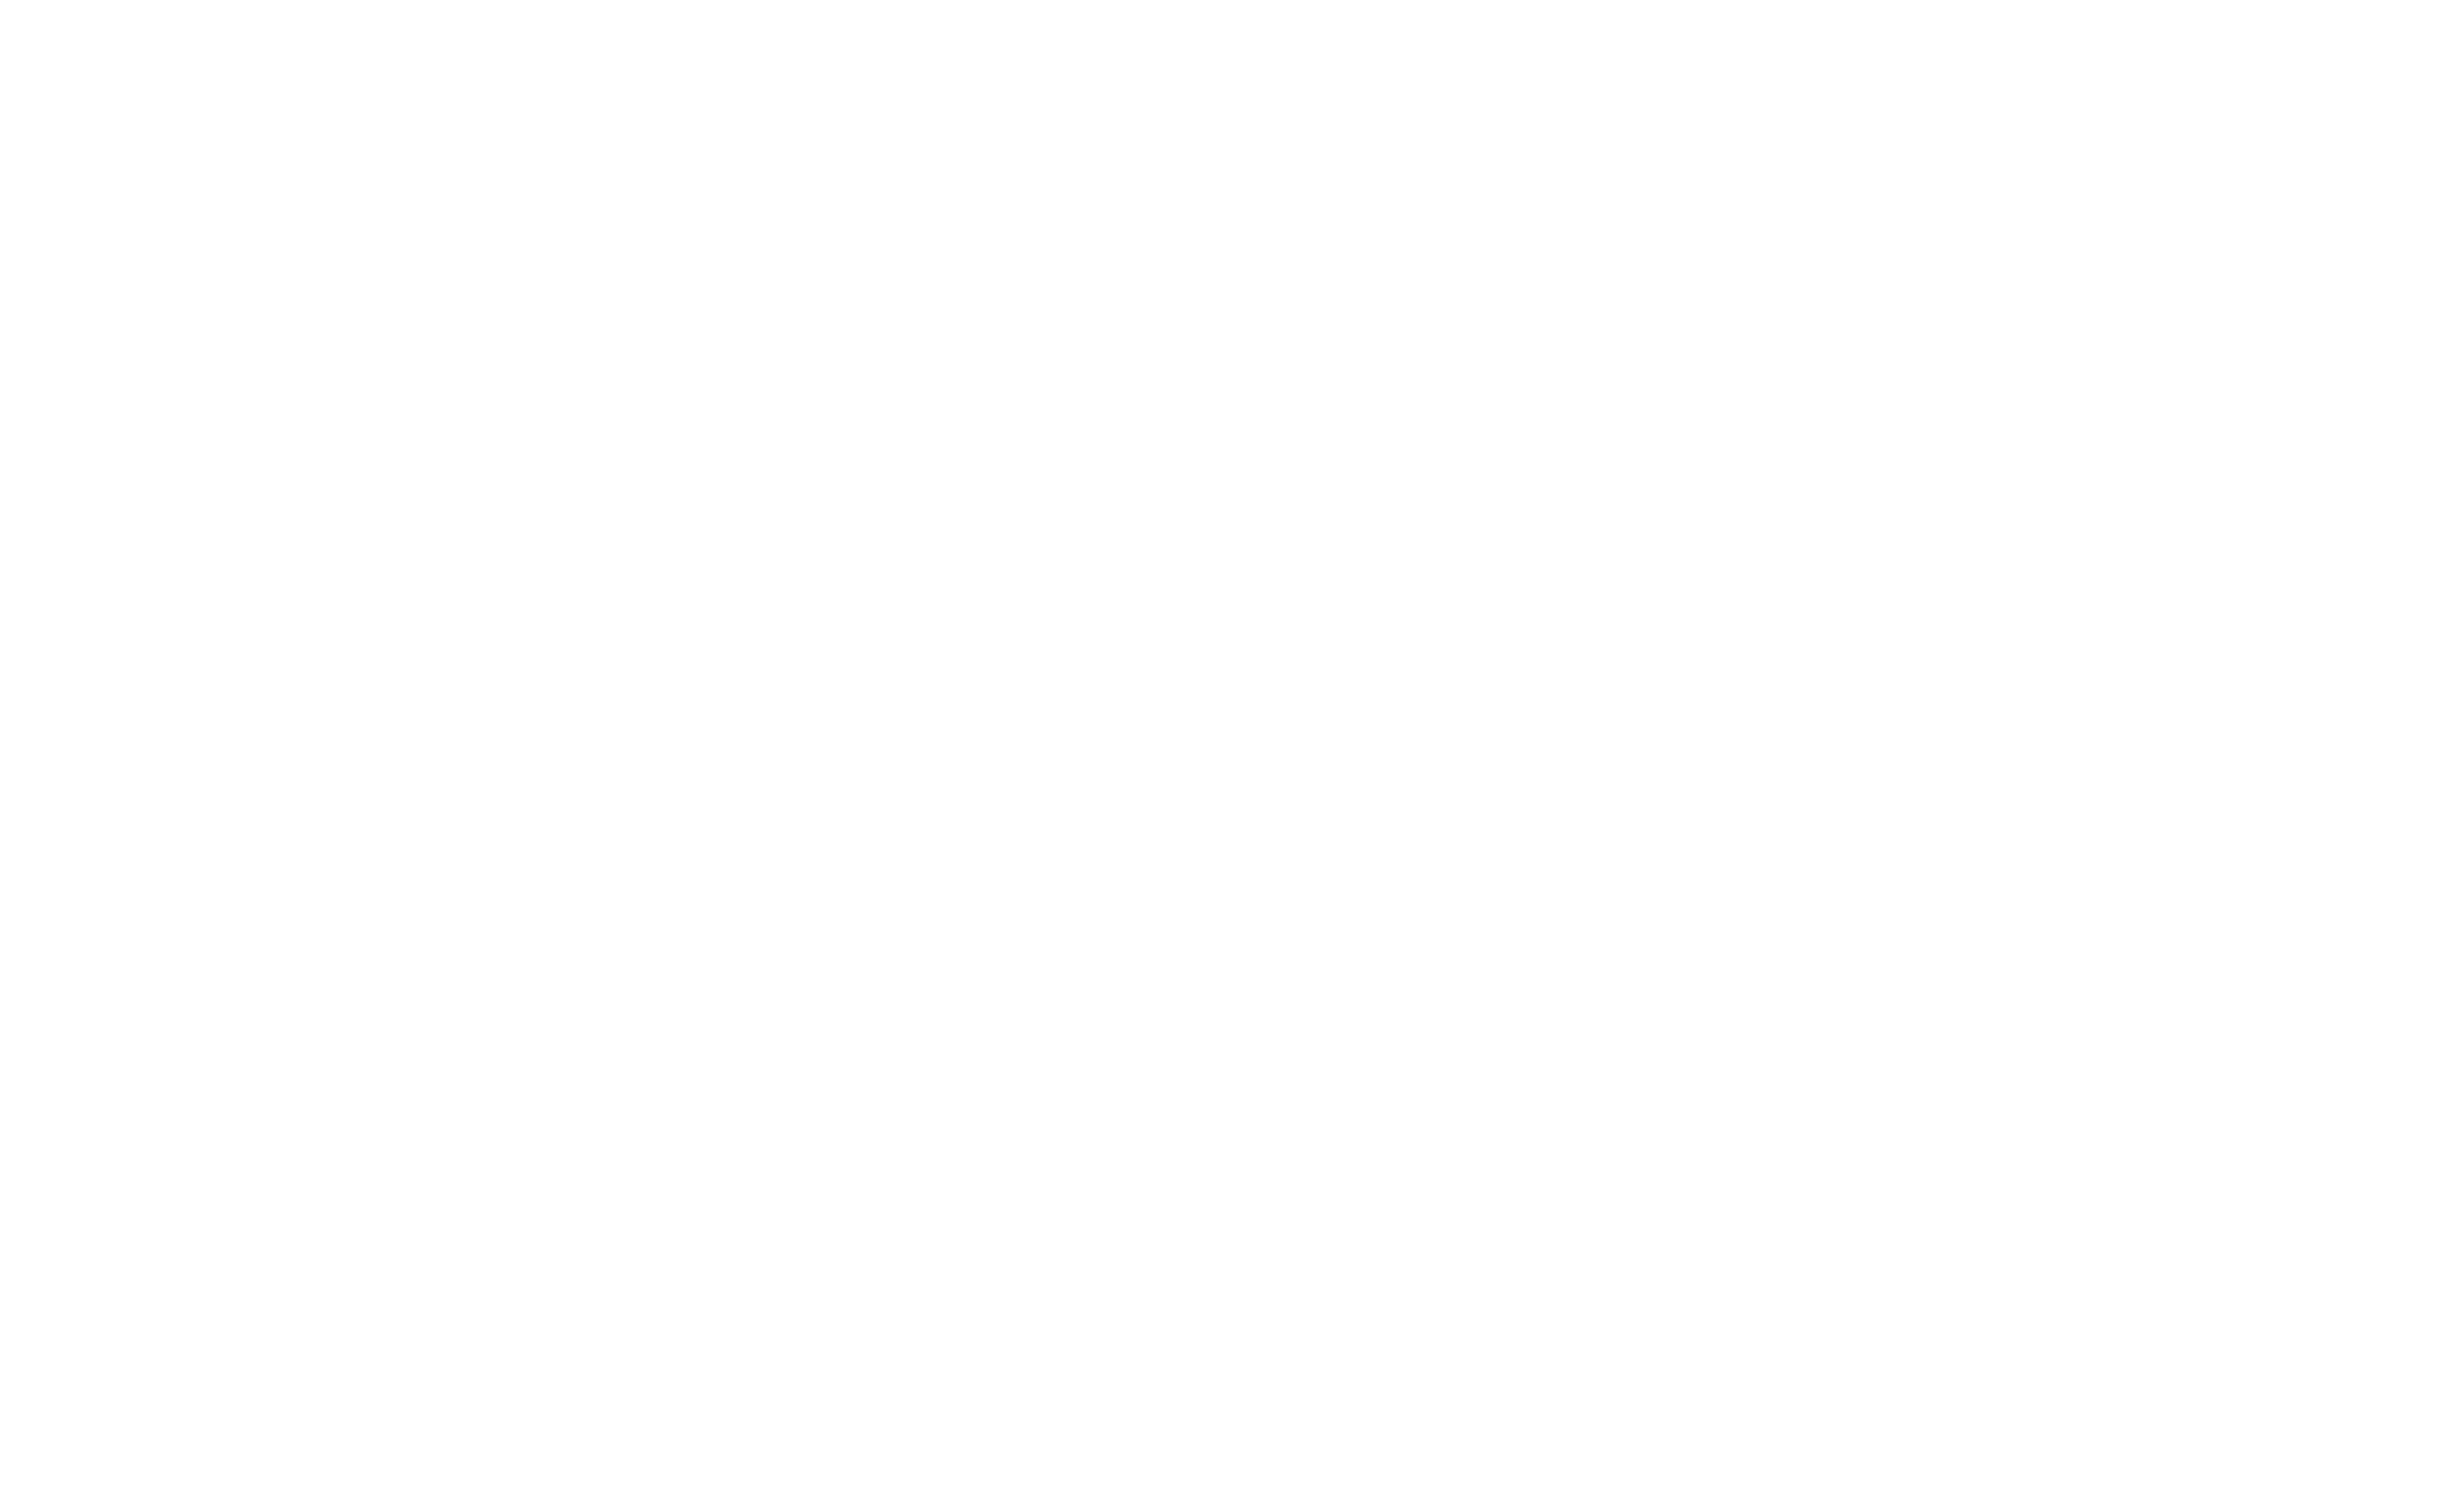

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,3), dpi = 1300)
plot_tree(win_tree, feature_names = X_label, class_names = y_label, fontsize = 3, filled = True, rounded = False, impurity = False, max_depth = 5)
plt.show()

In [13]:
count = 'Completed Process'
elapsed = (time.time() - start)
print ("%s in %s seconds" % (count,elapsed))

Completed Process in 76.88794350624084 seconds
